In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [5]:
# Define the constraints
def constraint1(x1, x2):
    return -2*x1 + x2 <= 2

def constraint2(x1, x2):
    return 2*x1+5*x2 >= 10

def constraint3(x1, x2):
    return x1-4*x2 <= 2

In [6]:
# Create a meshgrid for x1 and x2
x1 = np.linspace(0, 4, 100)
x2 = np.linspace(0, 4, 100)
x1, x2 = np.meshgrid(x1, x2)

In [7]:
# Create z for each constraint
z1 = constraint1(x1, x2)
z2 = constraint2(x1, x2)
z3 = constraint3(x1, x2)

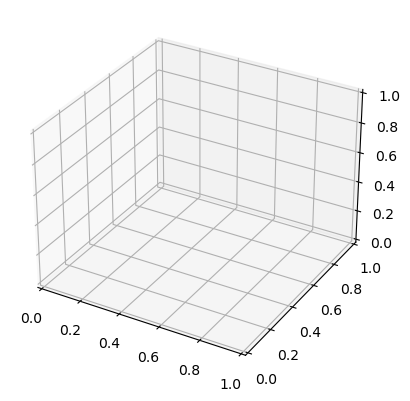

In [8]:
# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [9]:
# Plot the constraints
ax.plot_surface(x1, x2, z1, alpha=0.5, rstride=100, cstride=100, color='blue', label='-2*x1 + x2 <= 2')
ax.plot_surface(x1, x2, z2, alpha=0.5, rstride=100, cstride=100, color='green', label='2*x1+5*x2 >= 10')
ax.plot_surface(x1, x2, z3, alpha=0.5, rstride=100, cstride=100, color='red', label='x1-4*x2 <= 2')

In [10]:
# Fill the feasible region
z = np.maximum(z1, z2, z3)
ax.plot_surface(x1, x2, z, color='grey', alpha=0.3, rstride=100, cstride=100)

In [11]:
# Plot the objective function as contours
x1_contour, x2_contour = np.linspace(0, 4, 10), np.linspace(0, 4, 10)
X1_contour, X2_contour = np.meshgrid(x1_contour, x2_contour)
Z_contour = X1_contour + 2 * X2_contour + 3 * np.maximum(0, np.minimum(constraint1(X1_contour, X2_contour), constraint2(X1_contour, X2_contour)))

In [12]:
# Plot contour lines
contour = ax.contour3D(X1_contour, X2_contour, Z_contour, 50, cmap='viridis')
ax.clabel(contour, inline=True, fontsize=8)

In [13]:
# Labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('3D Linear Programming Visualization')

Text(0.5, 0.92, '3D Linear Programming Visualization')

In [14]:
plt.show()

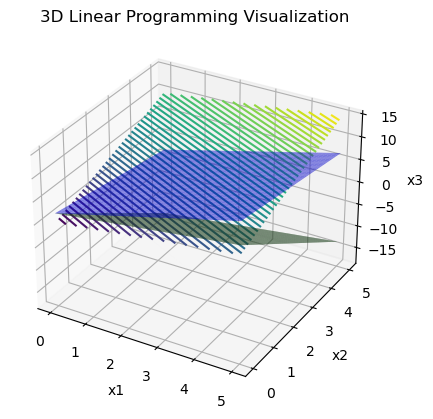

In [16]:
#Problem 2

# Create a meshgrid for x1 and x2
x1 = np.linspace(0, 5, 100)
x2 = np.linspace(0, 5, 100)
x1, x2 = np.meshgrid(x1, x2)

# Define the constraints
def constraint1(x1, x2):
    return 2 + 2 * x1 - x2

def constraint2(x1, x2):
    return (10 - 2 * x1 - 5 * x2) / 0.0  # This function will not be used directly

def constraint3(x1, x2):
    return 2 + x1 - 4 * x2

# Compute z values for constraints
z1 = constraint1(x1, x2)
z3 = constraint3(x1, x2)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the constraints
ax.plot_surface(x1, x2, z1, alpha=0.5, color='blue', label=r'$-2x_1 + x_2 \leq 2$')
ax.plot_surface(x1, x2, z3, alpha=0.5, color='green', label=r'$x_1 - 4x_2 \leq 2$')

# Plot the feasible region
# In practice, finding the intersection of constraints is complex; visualize it in a simplified way
z_fill = np.minimum(z1, z3)
ax.plot_surface(x1, x2, z_fill, color='grey', alpha=0.3)

# Plot the objective function as contours
x1_contour, x2_contour = np.linspace(0, 5, 10), np.linspace(0, 5, 10)
X1_contour, X2_contour = np.meshgrid(x1_contour, x2_contour)
Z_contour = X1_contour + 2 * X2_contour

# Plot contour lines
contour = ax.contour3D(X1_contour, X2_contour, Z_contour, 50, cmap='viridis')
ax.clabel(contour, inline=True, fontsize=8)

# Labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('3D Linear Programming Visualization')

plt.show()

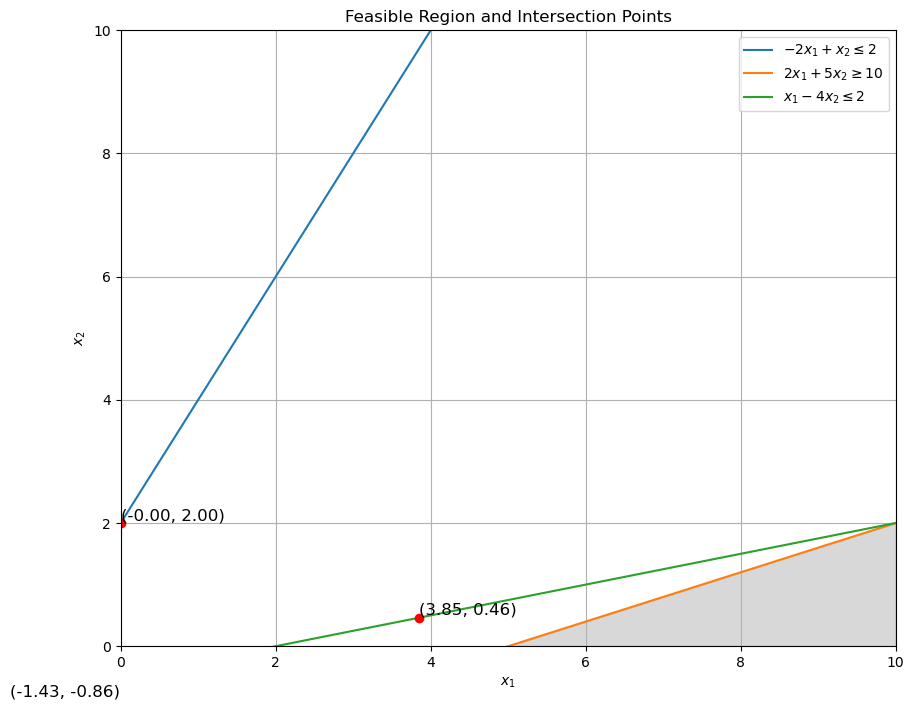

Optimal value: 4.77
Optimal point: x1 = 3.85, x2 = 0.46


In [21]:
# Define the constraints
def constraint1(x1):
    return 2 + 2 * x1

def constraint2(x1):
    return (2 * x1 - 10) / 5

def constraint3(x1):
    return (x1 - 2) / 4

# Create a range of x values
x = np.linspace(0, 10, 400)

# Calculate y values for constraints
y1 = constraint1(x)
y2 = constraint2(x)
y3 = constraint3(x)

# Plot constraints
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label=r'$-2x_1 + x_2 \leq 2$')
plt.plot(x, y2, label=r'$2x_1 + 5x_2 \geq 10$')
plt.plot(x, y3, label=r'$x_1 - 4x_2 \leq 2$')

# Fill feasible region
y_fill = np.minimum(np.minimum(y1, y2), y3)
plt.fill_between(x, 0, y_fill, where=(y_fill > 0), color='grey', alpha=0.3)

# Calculate intersection points
def find_intersection(A, b):
    return np.linalg.solve(A, b)

# Intersection of constraints 1 and 2
A = np.array([[-2, 1], [2, 5]])
b = np.array([2, 10])
p1 = find_intersection(A, b)

# Intersection of constraints 1 and 3
A = np.array([[-2, 1], [1, -4]])
b = np.array([2, 2])
p2 = find_intersection(A, b)

# Intersection of constraints 2 and 3
A = np.array([[2, 5], [1, -4]])
b = np.array([10, 2])
p3 = find_intersection(A, b)

# Plot intersection points
plt.plot(p1[0], p1[1], 'ro')  # Intersection of constraints 1 and 2
plt.plot(p2[0], p2[1], 'ro')  # Intersection of constraints 1 and 3
plt.plot(p3[0], p3[1], 'ro')  # Intersection of constraints 2 and 3

# Annotate intersection points
plt.text(p1[0], p1[1], f'({p1[0]:.2f}, {p1[1]:.2f})', fontsize=12, verticalalignment='bottom')
plt.text(p2[0], p2[1], f'({p2[0]:.2f}, {p2[1]:.2f})', fontsize=12, verticalalignment='bottom')
plt.text(p3[0], p3[1], f'({p3[0]:.2f}, {p3[1]:.2f})', fontsize=12, verticalalignment='bottom')

# Labels and title
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Feasible Region and Intersection Points')
plt.legend()
plt.grid(True)
plt.show()

# Objective function evaluation
def objective(x1, x2):
    return x1 + 2 * x2

# Evaluate the objective function at intersection points
points = [p1, p2, p3]
values = [objective(p[0], p[1]) for p in points]

# Find the maximum value and corresponding point
optimal_value = max(values)
optimal_point = points[values.index(optimal_value)]

print(f"Optimal value: {optimal_value:.2f}")
print(f"Optimal point: x1 = {optimal_point[0]:.2f}, x2 = {optimal_point[1]:.2f}")

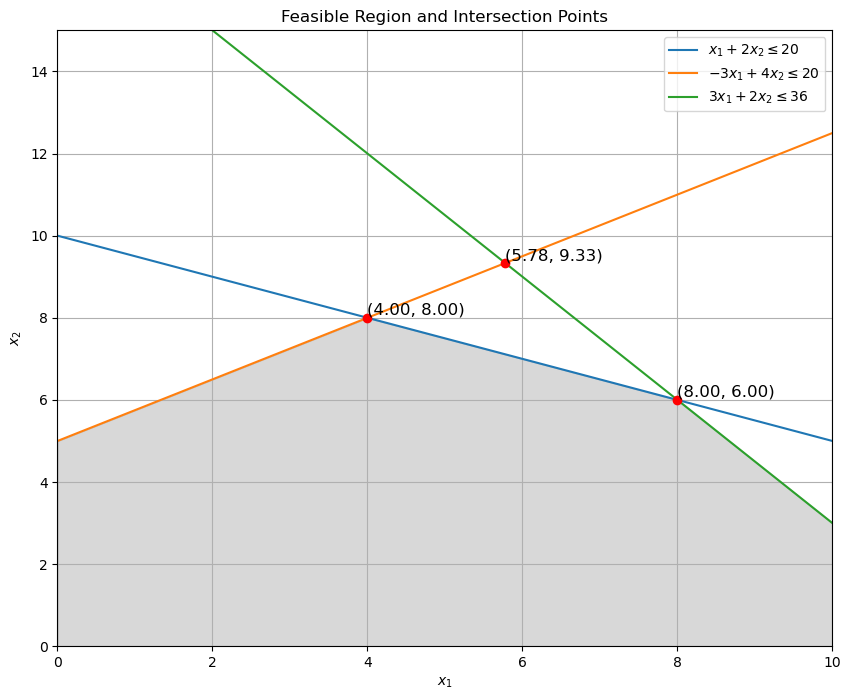

Optimal value: 24.44
Optimal point: x1 = 5.78, x2 = 9.33


In [18]:
#Problem 4
#사실 할 필요 없었음

# Define the constraints
def constraint1(x1):
    return (20 - x1) / 2

def constraint2(x1):
    return (20 + 3 * x1) / 4

def constraint3(x1):
    return (36 - 3 * x1) / 2

# Create a range of x values
x = np.linspace(0, 10, 400)

# Calculate y values for constraints
y1 = constraint1(x)
y2 = constraint2(x)
y3 = constraint3(x)

# Plot constraints
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label=r'$x_1 + 2x_2 \leq 20$')
plt.plot(x, y2, label=r'$-3x_1 + 4x_2 \leq 20$')
plt.plot(x, y3, label=r'$3x_1 + 2x_2 \leq 36$')

# Fill feasible region
y_fill = np.minimum(np.minimum(y1, y2), y3)
plt.fill_between(x, 0, y_fill, where=(y_fill > 0), color='grey', alpha=0.3)

# Calculate intersection points
def find_intersection(A, b):
    return np.linalg.solve(A, b)

# Intersection of constraints 1 and 2
A = np.array([[1, 2], [-3, 4]])
b = np.array([20, 20])
p1 = find_intersection(A, b)

# Intersection of constraints 1 and 3
A = np.array([[1, 2], [3, 2]])
b = np.array([20, 36])
p2 = find_intersection(A, b)

# Intersection of constraints 2 and 3
A = np.array([[-3, 4], [3, 2]])
b = np.array([20, 36])
p3 = find_intersection(A, b)

# Plot intersection points
plt.plot(p1[0], p1[1], 'ro')  # Intersection of constraints 1 and 2
plt.plot(p2[0], p2[1], 'ro')  # Intersection of constraints 1 and 3
plt.plot(p3[0], p3[1], 'ro')  # Intersection of constraints 2 and 3

# Annotate intersection points
plt.text(p1[0], p1[1], f'({p1[0]:.2f}, {p1[1]:.2f})', fontsize=12, verticalalignment='bottom')
plt.text(p2[0], p2[1], f'({p2[0]:.2f}, {p2[1]:.2f})', fontsize=12, verticalalignment='bottom')
plt.text(p3[0], p3[1], f'({p3[0]:.2f}, {p3[1]:.2f})', fontsize=12, verticalalignment='bottom')

# Labels and title
plt.xlim(0, 10)
plt.ylim(0, 15)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Feasible Region and Intersection Points')
plt.legend()
plt.grid(True)
plt.show()

# Objective function evaluation
def objective(x1, x2):
    return x1 + 2 * x2

# Evaluate the objective function at intersection points
points = [p1, p2, p3]
values = [objective(p[0], p[1]) for p in points]

# Find the maximum value and corresponding point
optimal_value = max(values)
optimal_point = points[values.index(optimal_value)]

print(f"Optimal value: {optimal_value:.2f}")
print(f"Optimal point: x1 = {optimal_point[0]:.2f}, x2 = {optimal_point[1]:.2f}")

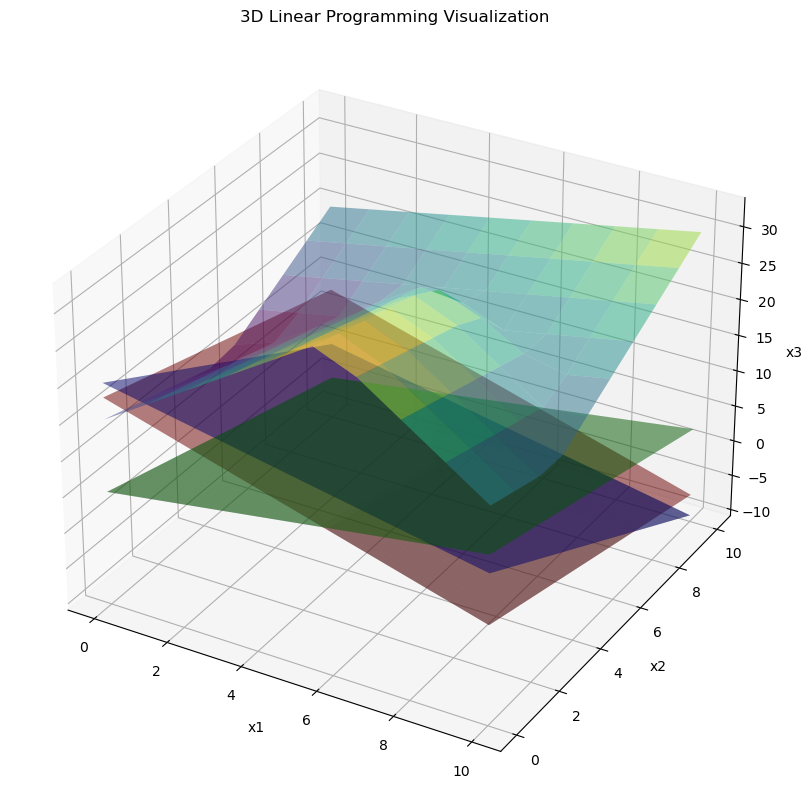

TypeError: bad operand type for unary -: 'NoneType'

In [19]:
# Create a meshgrid for x1 and x2
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(0, 10, 100)
x1, x2 = np.meshgrid(x1, x2)

# Define the constraints
def constraint1(x1, x2):
    return 20 - x1 - 2 * x2

def constraint2(x1, x2):
    return (20 + 3 * x1) / 4 - x2

def constraint3(x1, x2):
    return (36 - 3 * x1) / 2 - x2

# Calculate z values for constraints
z1 = constraint1(x1, x2)
z2 = constraint2(x1, x2)
z3 = constraint3(x1, x2)

# Create the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the constraints
ax.plot_surface(x1, x2, z1, alpha=0.5, rstride=100, cstride=100, color='blue', label='x1 + 2x2 <= 20')
ax.plot_surface(x1, x2, z2, alpha=0.5, rstride=100, cstride=100, color='green', label='-3x1 + 4x2 <= 20')
ax.plot_surface(x1, x2, z3, alpha=0.5, rstride=100, cstride=100, color='red', label='3x1 + 2x2 <= 36')

# Fill the feasible region
z_fill = np.minimum(np.minimum(z1, z2), z3)
ax.plot_surface(x1, x2, z_fill, color='grey', alpha=0.3)

# Plot the objective function as a surface
x1_contour, x2_contour = np.linspace(0, 10, 10), np.linspace(0, 10, 10)
X1_contour, X2_contour = np.meshgrid(x1_contour, x2_contour)
Z_contour = X1_contour + 2 * X2_contour + 3 * np.maximum(0, np.minimum(constraint1(X1_contour, X2_contour), np.minimum(constraint2(X1_contour, X2_contour), constraint3(X1_contour, X2_contour))))

# Plot objective function surface
ax.plot_surface(X1_contour, X2_contour, Z_contour, cmap='viridis', alpha=0.5)

# Labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('3D Linear Programming Visualization')

plt.show()

# Finding intersection points
from scipy.optimize import linprog

# Objective function coefficients (negative for maximization)
c = [-1, -2, -3]  # For maximization, use negative coefficients for linprog

# Constraints in the form of Ax <= b
A = [
    [1, 2, 0],
    [-3, 4, 0],
    [3, 2, 0]
]
b = [20, 20, 36]

# Bounds for x1, x2, x3
x_bounds = (0, None)
bounds = [x_bounds, x_bounds, (0, None)]

# Solve the linear program
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Display the result
print(f"Optimal value: {-result.fun:.2f}")
print(f"Optimal solution: x1 = {result.x[0]:.2f}, x2 = {result.x[1]:.2f}, x3 = {result.x[2]:.2f}")

LinAlgError: Singular matrix

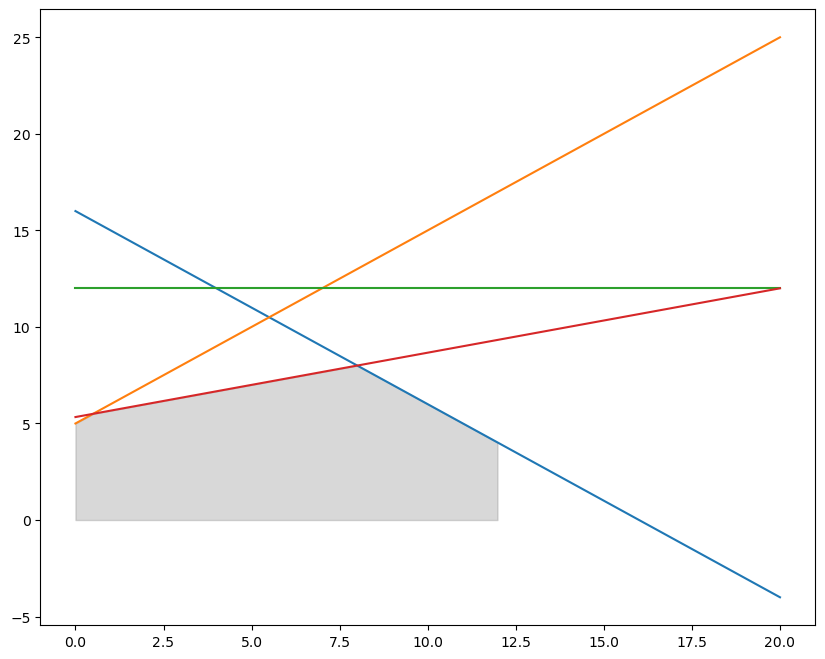

In [24]:
#Problem 5_Error
# Define the constraints
def constraint1(x1):
    return 16 - x1

def constraint2(x1):
    return 5 + x1

def constraint3(x1):
    return 12

def constraint4(x1):
    return (16 + x1) / 3

# Create a range of x values
x = np.linspace(0, 20, 400)

# Calculate y values for constraints
y1 = constraint1(x)
y2 = constraint2(x)
y3 = np.ones_like(x) * constraint3(x[0])
y4 = constraint4(x)

# Plot constraints
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label=r'$x_1 + x_2 \leq 16$')
plt.plot(x, y2, label=r'$-x_1 + x_2 \leq 5$')
plt.plot(x, y3, label=r'$x_1 \leq 12$')
plt.plot(x, y4, label=r'$-x_1 + 3x_2 \leq 16$')

# Fill feasible region
y_fill = np.minimum(np.minimum(y1, y2), y4)
plt.fill_between(x, 0, y_fill, where=(y_fill > 0) & (x <= 12), color='grey', alpha=0.3)

# Calculate intersection points
def find_intersection(A, b):
    return np.linalg.solve(A, b)

# Intersection of constraints 1 and 2
A = np.array([[1, -1], [-1, 1]])
b = np.array([16, 5])
p1 = find_intersection(A, b)

# Intersection of constraints 1 and 4
A = np.array([[1, -1], [-1, 3]])
b = np.array([16, 16])
p2 = find_intersection(A, b)

# Intersection of constraints 2 and 4
A = np.array([[-1, 1], [-1, 3]])
b = np.array([5, 16])
p3 = find_intersection(A, b)

# Intersection of constraints 1 and 3
A = np.array([[1, 1], [1, 0]])
b = np.array([16, 12])
p4 = find_intersection(A, b)

# Plot intersection points
plt.plot(p1[0], p1[1], 'ro')  # Intersection of constraints 1 and 2
plt.plot(p2[0], p2[1], 'ro')  # Intersection of constraints 1 and 4
plt.plot(p3[0], p3[1], 'ro')  # Intersection of constraints 2 and 4
plt.plot(p4[0], p4[1], 'ro')  # Intersection of constraints 1 and 3

# Annotate intersection points
plt.text(p1[0], p1[1], f'({p1[0]:.2f}, {p1[1]:.2f})', fontsize=12, verticalalignment='bottom')
plt.text(p2[0], p2[1], f'({p2[0]:.2f}, {p2[1]:.2f})', fontsize=12, verticalalignment='bottom')
plt.text(p3[0], p3[1], f'({p3[0]:.2f}, {p3[1]:.2f})', fontsize=12, verticalalignment='bottom')
plt.text(p4[0], p4[1], f'({p4[0]:.2f}, {p4[1]:.2f})', fontsize=12, verticalalignment='bottom')

# Labels and title
plt.xlim(0, 15)
plt.ylim(0, 20)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Feasible Region and Intersection Points')
plt.legend()
plt.grid(True)
plt.show()

# Objective function evaluation for minimization
def objective(x1, x2):
    return -x1 - 2 * x2

# Evaluate the objective function at intersection points
points = [p1, p2, p3, p4]
# Filter out points that do not satisfy the non-negativity constraints
points = [p for p in points if p[0] >= 0 and p[1] >= 0]
values = [objective(p[0], p[1]) for p in points]

# Find the minimum value and corresponding point
optimal_value = min(values)
optimal_point = points[values.index(optimal_value)]

print(f"Optimal value: {optimal_value:.2f}")
print(f"Optimal point: x1 = {optimal_point[0]:.2f}, x2 = {optimal_point[1]:.2f}")

# Use linear programming solver to verify result
c = [-1, -2]  # Objective function coefficients (negative because linprog does minimization by default)
A = [
    [1, 1],   # x1 + x2 <= 16
    [-1, 1],  # -x1 + x2 <= 5
    [1, 0],   # x1 <= 12
    [-1, 3]   # -x1 + 3x2 <= 16
]
b = [16, 5, 12, 16]

# Bounds for x1 and x2
bounds = [(0, None), (0, None)]

# Solve the linear program
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Display the result from linprog
print(f"Optimal value using linprog: {result.fun:.2f}")
print(f"Optimal point using linprog: x1 = {result.x[0]:.2f}, x2 = {result.x[1]:.2f}")

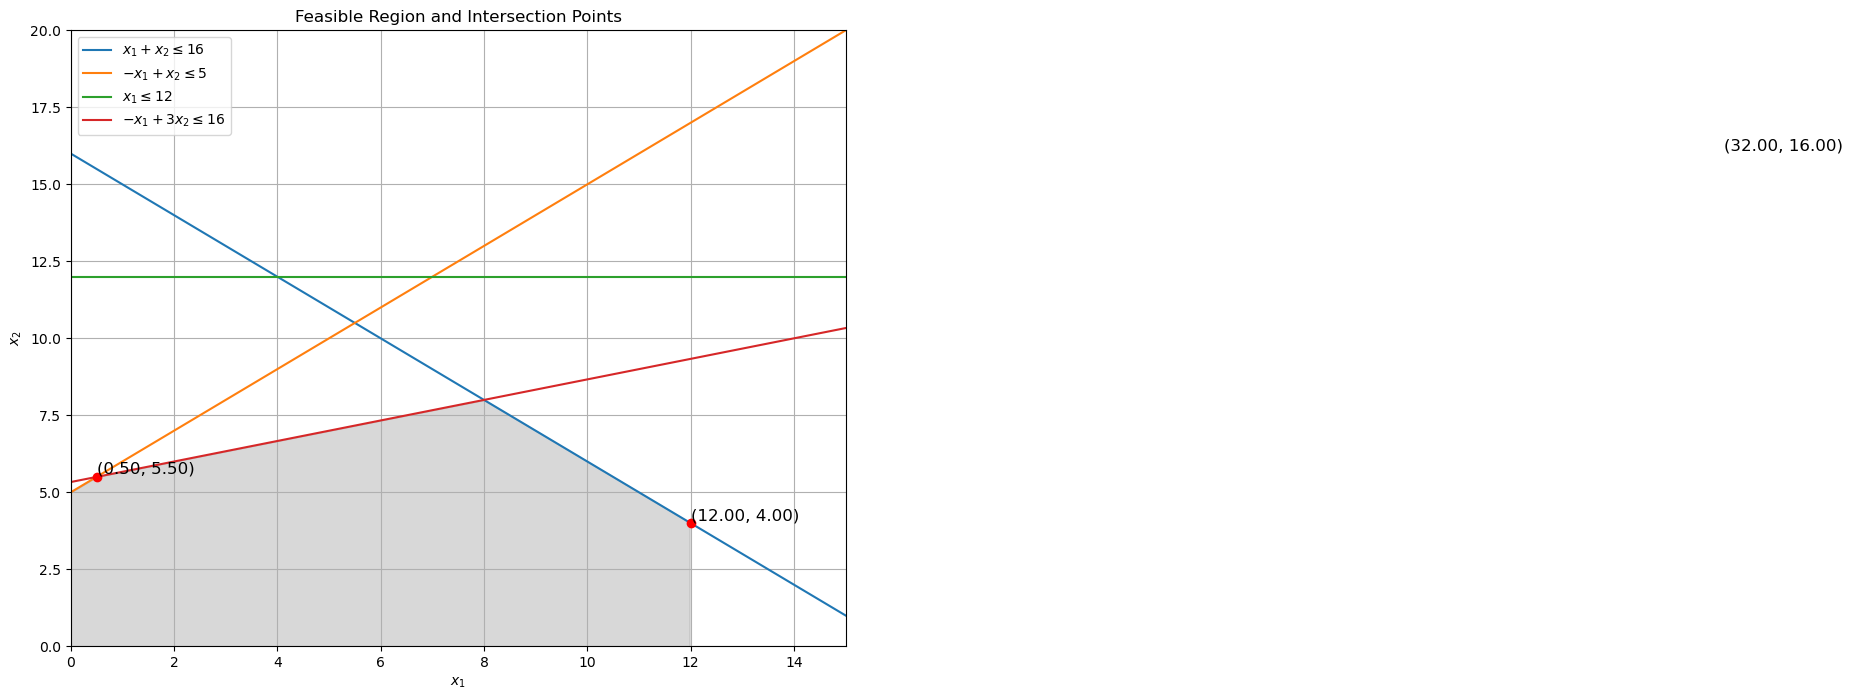

Optimal value: -64.00
Optimal point: x1 = 32.00, x2 = 16.00
Optimal value using linprog: -24.00
Optimal point using linprog: x1 = 8.00, x2 = 8.00


In [25]:
#Problem5(b)_Revised
# Define the constraints
#답까지 맞음
def constraint1(x1):
    return 16 - x1

def constraint2(x1):
    return 5 + x1

def constraint3(x1):
    return 12

def constraint4(x1):
    return (16 + x1) / 3

# Create a range of x values
x = np.linspace(0, 20, 400)

# Calculate y values for constraints
y1 = constraint1(x)
y2 = constraint2(x)
y3 = np.ones_like(x) * constraint3(x[0])
y4 = constraint4(x)

# Plot constraints
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label=r'$x_1 + x_2 \leq 16$')
plt.plot(x, y2, label=r'$-x_1 + x_2 \leq 5$')
plt.plot(x, y3, label=r'$x_1 \leq 12$')
plt.plot(x, y4, label=r'$-x_1 + 3x_2 \leq 16$')

# Fill feasible region
y_fill = np.minimum(np.minimum(y1, y2), y4)
plt.fill_between(x, 0, y_fill, where=(y_fill > 0) & (x <= 12), color='grey', alpha=0.3)

# Calculate intersection points
def find_intersection(A, b):
    try:
        return np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        return None

# Intersection of constraints 1 and 2
A = np.array([[1, -1], [-1, 1]])
b = np.array([16, 5])
p1 = find_intersection(A, b)

# Intersection of constraints 1 and 4
A = np.array([[1, -1], [-1, 3]])
b = np.array([16, 16])
p2 = find_intersection(A, b)

# Intersection of constraints 2 and 4
A = np.array([[-1, 1], [-1, 3]])
b = np.array([5, 16])
p3 = find_intersection(A, b)

# Intersection of constraints 1 and 3
A = np.array([[1, 1], [1, 0]])
b = np.array([16, 12])
p4 = find_intersection(A, b)

# Filter out None values and points that are not in the feasible region
points = [p for p in [p1, p2, p3, p4] if p is not None and p[0] >= 0 and p[1] >= 0]

# Plot intersection points
for p in points:
    plt.plot(p[0], p[1], 'ro')  # Plot each intersection point
    plt.text(p[0], p[1], f'({p[0]:.2f}, {p[1]:.2f})', fontsize=12, verticalalignment='bottom')

# Labels and title
plt.xlim(0, 15)
plt.ylim(0, 20)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Feasible Region and Intersection Points')
plt.legend()
plt.grid(True)
plt.show()

# Objective function evaluation for minimization
def objective(x1, x2):
    return -x1 - 2 * x2

# Evaluate the objective function at intersection points
values = [objective(p[0], p[1]) for p in points]

# Find the minimum value and corresponding point
optimal_value = min(values)
optimal_point = points[values.index(optimal_value)]

print(f"Optimal value: {optimal_value:.2f}")
print(f"Optimal point: x1 = {optimal_point[0]:.2f}, x2 = {optimal_point[1]:.2f}")

# Use linear programming solver to verify result
c = [-1, -2]  # Objective function coefficients (negative because linprog does minimization by default)
A = [
    [1, 1],   # x1 + x2 <= 16
    [-1, 1],  # -x1 + x2 <= 5
    [1, 0],   # x1 <= 12
    [-1, 3]   # -x1 + 3x2 <= 16
]
b = [16, 5, 12, 16]

# Bounds for x1 and x2
bounds = [(0, None), (0, None)]

# Solve the linear program
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Display the result from linprog
print(f"Optimal value using linprog: {result.fun:.2f}")
print(f"Optimal point using linprog: x1 = {result.x[0]:.2f}, x2 = {result.x[1]:.2f}")

In [2]:
#Homework 3
#Problem 2
import cvxpy as cp

# Define the variables
x1 = cp.Variable(nonneg=True)  # x1 >= 0
x2 = cp.Variable(nonneg=True)  # x2 >= 0

# Define the objective function
objective = cp.Maximize(x1 + 2 * x2)

# Define the constraints
constraints = [
    -2 * x1 + x2 <= 2,
    2 * x1 + 5 * x2 >= 10,
    x1 - 4 * x2 <= 2
]

# Set up the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Print the results
print("Optimal value for z:", problem.value)
print("Optimal value for x1:", x1.value)
print("Optimal value for x2:", x2.value)

Optimal value for z: inf
Optimal value for x1: None
Optimal value for x2: None


In [14]:
import cvxpy as cp

# Define the variables
x1 = cp.Variable()
x2 = cp.Variable()

# Define the objective function
objective = cp.Minimize(-x1 - 2 * x2)

# Define the constraints
constraints = [
    x1 + x2 <= 16,
    -x1 + x2 <= 5,
    x1 <= 12,
    -x1 + 3 * x2 <= 16,
    x1 >= 0,
    x2 >= 0
]

# Formulate the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Print the results
print("Optimal value of x1:", x1.value)
print("Optimal value of x2:", x2.value)
print("Minimum value of the objective function:", problem.value)

Optimal value of x1: 8.00000000157084
Optimal value of x2: 7.999999998054696
Minimum value of the objective function: -23.99999999768023


In [16]:
import cvxpy as cp

# Define the variables
x1 = cp.Variable()
x2 = cp.Variable()

# Define the objective function
objective = cp.Minimize(-x1 - 2 * x2)

# Define the constraints
constraints = [
    x1 + x2 <= 16,
    -x1 + x2 <= 5,
    x1 <= 12,
    -x1 + 3 * x2 <= 16,
    x1 >= 0,
    x2 >= 0
]

# Formulate the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Convert results to rounded integers
optimal_x1 = round(x1.value[0]) if x1.value is not None else None
optimal_x2 = round(x2.value[0]) if x2.value is not None else None

# Print the results
print("Optimal value of x1 (rounded integer):", optimal_x1)
print("Optimal value of x2 (rounded integer):", optimal_x2)
print("Minimum value of the objective function:", problem.value)

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [19]:
import cvxpy as cp

# Define the variables
x1 = cp.Variable()
x2 = cp.Variable()

# Define the objective function
objective = cp.Minimize(-x1 - 2 * x2)

# Define the constraints
constraints = [
    x1 + x2 <= 16,
    -x1 + x2 <= 5,
    x1 <= 12,
    -x1 + 3 * x2 <= 16,
    x1 >= 0,
    x2 >= 0
]

# Formulate the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Convert results to rounded integers
optimal_x1 = round(x1.value.item()) if x1.value is not None else None
optimal_x2 = round(x2.value.item()) if x2.value is not None else None
minimum_value = round(problem.value) if problem.value is not None else None

# Print the results
print("Optimal value of x1 (rounded integer):", optimal_x1)
print("Optimal value of x2 (rounded integer):", optimal_x2)
print("Minimum value of the objective function (rounded integer):", minimum_value)

Optimal value of x1 (rounded integer): 8
Optimal value of x2 (rounded integer): 8
Minimum value of the objective function (rounded integer): -24
